In [1]:
import numpy as np
import pandas as pd

In [11]:
train_df = pd.read_csv('D:/Data/kaggle/house price/input/train.csv',index_col=0)
test_df = pd.read_csv('D:/Data/kaggle/house price/input/test.csv',index_col=0)

In [12]:
train_df.shape,test_df.shape    #train 多一列 SalePrice

((1460, 80), (1459, 79))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E67EC43EF0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001E600043DD8>]], dtype=object)

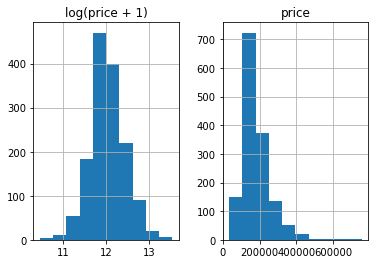

In [13]:
%matplotlib inline
prices = pd.DataFrame({'price':train_df['SalePrice'], 'log(price + 1)':np.log1p(train_df['SalePrice'])})
prices.hist()   #平滑处理

In [14]:
y_train = np.log1p(train_df.pop('SalePrice'))

In [15]:
all_df = pd.concat((train_df, test_df), axis=0)
all_df.shape  # 训练集和测试集先拼起来，做处理

(2919, 79)

In [16]:
all_df[:5]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [17]:
all_df['MSSubClass'] = all_df['MSSubClass'].astype(str)

In [18]:
all_df['MSSubClass'].value_counts()

20     1079
60      575
50      287
120     182
30      139
160     128
70      128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64

In [19]:
pd.get_dummies(all_df['MSSubClass'], prefix='MSSubClass')[:5]

,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90
Id,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [20]:
all_dummy_df = pd.get_dummies(all_df)
all_dummy_df[:5]

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,0,0,0,1,0,0,0,0,1,0
2,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,0,0,0,1,0,0,0,0,1,0
3,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,0,0,0,1,0,0,0,0,1,0
4,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,0,0,0,1,1,0,0,0,0,0
5,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,0,0,0,1,0,0,0,0,1,0


In [21]:
all_dummy_df.isnull().sum().sort_values(ascending=False)[:5]

LotFrontage     486
GarageYrBlt     159
MasVnrArea       23
BsmtHalfBath      2
BsmtFullBath      2
dtype: int64

In [22]:
mean_cols = all_dummy_df.mean()

In [23]:
all_dummy_df = all_dummy_df.fillna(mean_cols)

In [25]:
numeric_cols = all_df.columns[all_df.dtypes!='object']
numeric_cols

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [26]:
numeric_col_means = all_dummy_df.loc[:, numeric_cols].mean()
numeric_col_means

LotFrontage         69.305795
LotArea          10168.114080
OverallQual          6.089072
OverallCond          5.564577
YearBuilt         1971.312778
YearRemodAdd      1984.264474
MasVnrArea         102.201312
BsmtFinSF1         441.423235
BsmtFinSF2          49.582248
BsmtUnfSF          560.772104
TotalBsmtSF       1051.777587
1stFlrSF          1159.581706
2ndFlrSF           336.483727
LowQualFinSF         4.694416
GrLivArea         1500.759849
BsmtFullBath         0.429894
BsmtHalfBath         0.061364
FullBath             1.568003
HalfBath             0.380267
BedroomAbvGr         2.860226
KitchenAbvGr         1.044536
TotRmsAbvGrd         6.451524
Fireplaces           0.597122
GarageYrBlt       1978.113406
GarageCars           1.766621
GarageArea         472.874572
WoodDeckSF          93.709832
OpenPorchSF         47.486811
EnclosedPorch       23.098321
3SsnPorch            2.602261
ScreenPorch         16.062350
PoolArea             2.251799
MiscVal             50.825968
MoSold    

In [28]:
numeric_col_std = all_dummy_df.loc[:, numeric_cols].std()

In [29]:
all_dummy_df.loc[:,numeric_cols] = (all_dummy_df.loc[:,numeric_cols]-numeric_col_means)/numeric_col_std

In [30]:
all_dummy_df[:5]

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,-0.202033,-0.217841,0.646073,-0.507197,1.046078,0.896679,0.525112,0.580807,-0.29308,-0.934702,...,0,0,0,1,0,0,0,0,1,0
2,0.501785,-0.072032,-0.063174,2.187904,0.154737,-0.395536,-0.572152,1.177910,-0.29308,-0.629788,...,0,0,0,1,0,0,0,0,1,0
3,-0.061269,0.137173,0.646073,-0.507197,0.980053,0.848819,0.334770,0.097856,-0.29308,-0.288467,...,0,0,0,1,0,0,0,0,1,0
4,-0.436639,-0.078371,0.646073,-0.507197,-1.859033,-0.682695,-0.572152,-0.494856,-0.29308,-0.047266,...,0,0,0,1,1,0,0,0,0,0
5,0.689469,0.518814,1.355319,-0.507197,0.947040,0.753100,1.387248,0.468851,-0.29308,-0.161040,...,0,0,0,1,0,0,0,0,1,0


In [31]:
dummy_train_df = all_dummy_df.loc[train_df.index]
dummy_test_df = all_dummy_df.loc[test_df.index]

In [32]:
dummy_train_df.shape, dummy_test_df.shape

((1460, 303), (1459, 303))

In [33]:
x_train = dummy_train_df.values
x_test = dummy_train_df.values

In [34]:
from sklearn.linear_model import Ridge
ridge = Ridge(15)

In [35]:
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import cross_val_score

In [36]:
params = [1,10,15,20,25,30,40]
test_scores = []

In [37]:
for param in params:
    clf = BaggingRegressor(n_estimators=param, base_estimator=ridge)
    test_score = np.sqrt(-cross_val_score(clf,x_train,y_train,cv=10,scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

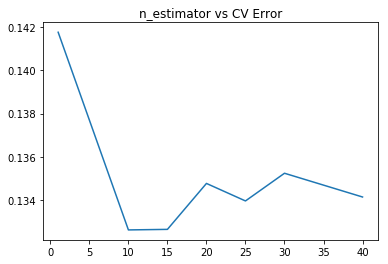

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(params, test_scores)
plt.title('n_estimator vs CV Error')

In [39]:
params = [10, 15, 20, 25, 30, 40, 50, 60, 70, 100]
test_scores = []
for param in params:
    clf = BaggingRegressor(n_estimators = param)
    test_score = np.sqrt(-cross_val_score(clf, x_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

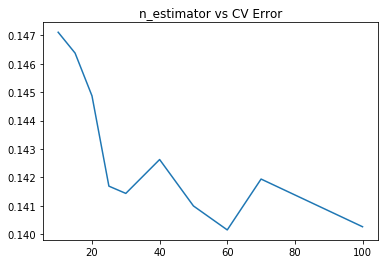

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(params, test_scores)
plt.title('n_estimator vs CV Error')

In [41]:
from sklearn.ensemble import AdaBoostRegressor

In [43]:
params = [10, 15, 20, 25, 30, 35, 40, 45, 50]
test_scores = []
for param in params:
    clf = BaggingRegressor(n_estimators = param, base_estimator = ridge)
    test_score = np.sqrt(-cross_val_score(clf,x_train,y_train,cv=10,scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

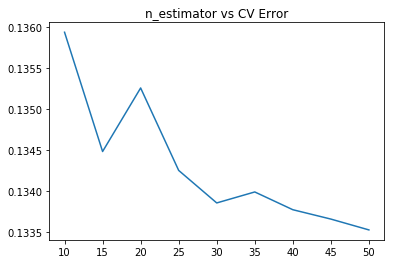

In [44]:
plt.plot(params, test_scores)
plt.title('n_estimator vs CV Error')

In [47]:
params = [10, 15, 20, 25, 30, 35, 40, 45, 50]
test_scores = []
for param in params:
    clf = BaggingRegressor(n_estimators=param)
    np.sqrt(-cross_val_score(clf, x_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

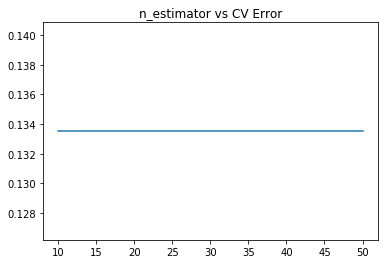

In [48]:
plt.plot(params, test_scores)
plt.title('n_estimator vs CV Error')

In [52]:
from xgboost import XGBRegressor

In [53]:
params = [1,2,3,4,5,6]
test_scores = []
for param in params:
    clf = XGBRegressor(max_depth = param)
    test_score = np.sqrt(-cross_val_score(clf, x_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

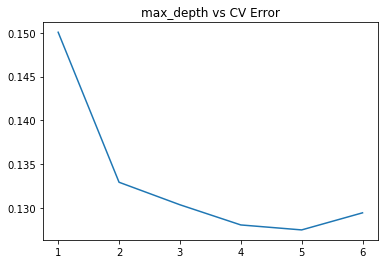

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(params, test_scores)
plt.title('max_depth vs CV Error')